In [1]:
#Importing all the necessary packages for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [2]:
matches = pd.read_csv('C:/Users/Nikitahp/Desktop/IPL/matches.csv')
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv('C:/Users/Nikitahp/Desktop/IPL/deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches['id'].max()

7953

In [5]:
print("Seasons of the IPL are:- ",matches['season'].unique())


Seasons of the IPL are:-  [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018]


# Number of matches each season

In [6]:
print("Number of seasons : ", len(matches.season.unique()))

Number of seasons :  11


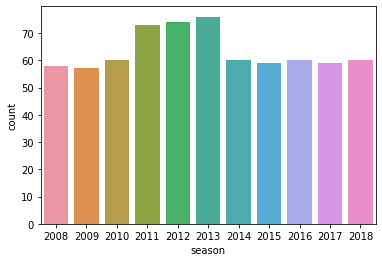

In [7]:
sb.countplot(x='season', data=matches)
plt.show()


# most successful bowlers season over season

In [8]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

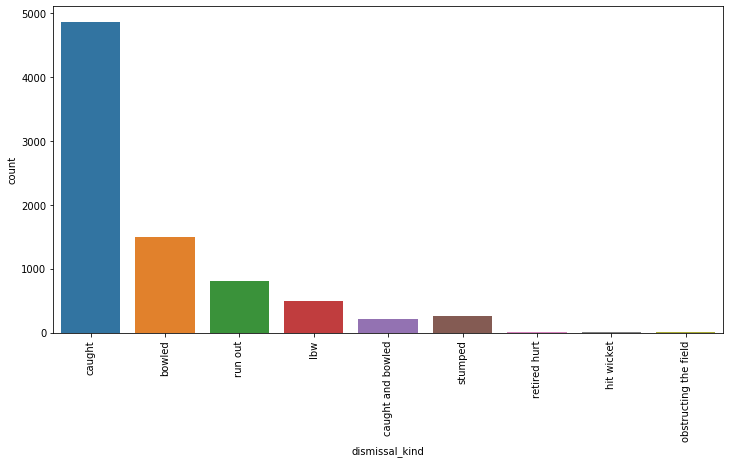

In [9]:

plt.figure(figsize=(12,6))
sb.countplot(x='dismissal_kind', data=deliveries)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
bowlers =deliveries[['bowler','dismissal_kind']]

In [11]:
bowlers = bowlers[(bowlers.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers.rename(columns={'dismissal_kind':'no_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_wickets', ascending=False)
bowlers = bowlers[(bowlers.no_wickets>=100)]
bowlers


,bowler,no_wickets
272,SL Malinga,154
5,A Mishra,146
215,PP Chawla,139
80,DJ Bravo,136
106,Harbhajan Singh,133
44,B Kumar,120
278,SP Narine,112
308,UT Yadav,111
220,R Ashwin,110
7,A Nehra,106


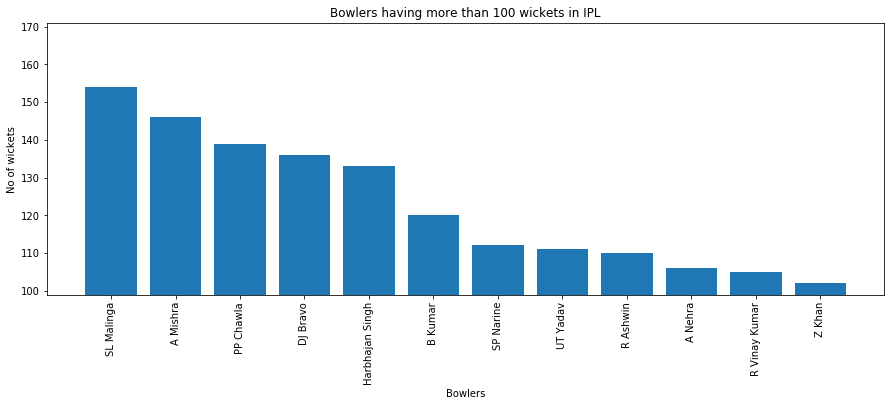

In [12]:
plt.figure(figsize=(15,5))
plt.bar(bowlers.bowler, bowlers.no_wickets)
plt.xticks(rotation=90)
plt.ylim(99,171)
plt.title('Bowlers having more than 100 wickets in IPL')
plt.xlabel('Bowlers')
plt.ylabel('No of wickets')
plt.show()

# most successful batsman season over season

In [13]:
deliveries['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

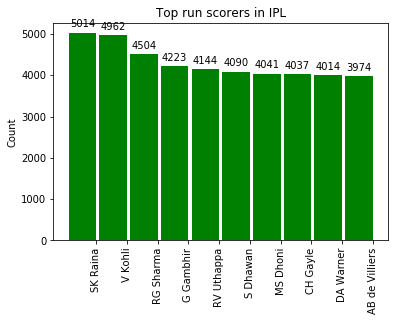

In [14]:
batsman = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman = batsman.iloc[:10,:]

labels = np.array(batsman['batsman'])
ind = np.arange(len(labels))
#print(ind)
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(batsman['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
autolabel(rects)
plt.show()

# players with more number of boundaries in IPL.

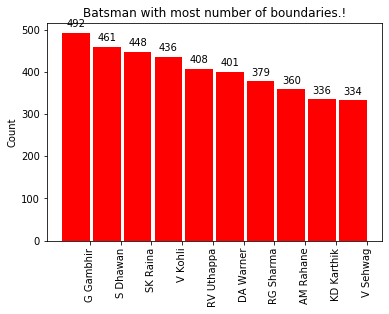

In [15]:
batsman = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman = batsman.iloc[:10,:]

labels = np.array(batsman['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(batsman['batsman_runs']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!")
autolabel(rects)
plt.show()

# who hits most number of sixes

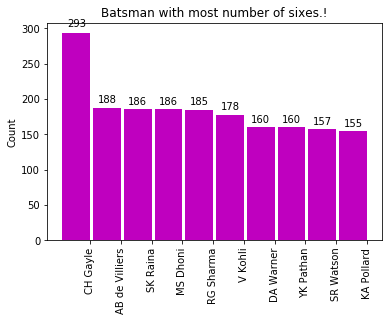

In [16]:
batsman = deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman = batsman.iloc[:10,:]

labels = np.array(batsman['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(batsman['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
autolabel(rects)
plt.show()


# Which Team had won by maximum runs?


In [17]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

# Which Team had won by maximum wickets?¶



In [18]:
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

# Which Team had won by minimum wickets?¶


In [19]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

# Top player of the match Winners¶


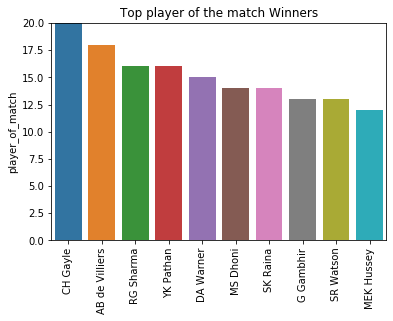

In [42]:
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sb.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

# Categorize match result :- Normal, tie, no result

normal       686
tie            7
no result      3
Name: result, dtype: int64


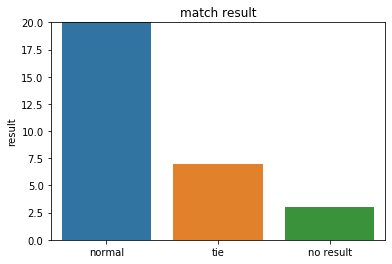

In [50]:
match_result=matches.result.value_counts()[:10]
print(match_result)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("match result")
sb.barplot(x = match_result.index, y = match_result, orient='v'); 

plt.show()

# Most popular match venues

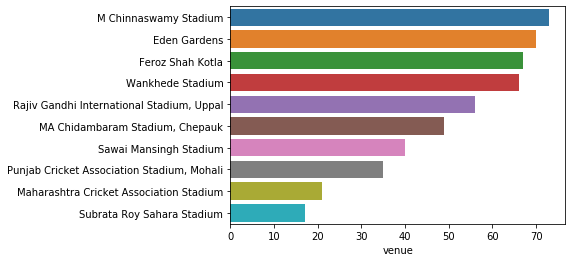

In [67]:
popular_venue=matches.venue.value_counts()[:10]
sb.barplot(y = popular_venue.index, x = popular_venue, orient='h');


# Top 10 Winners Team

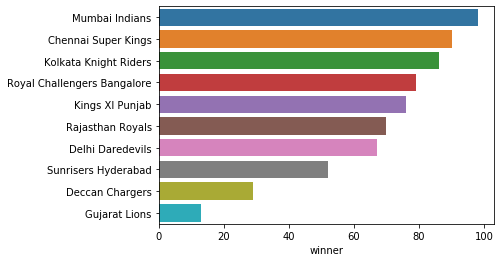

In [68]:
winner_team=matches.winner.value_counts()[:10]
sb.barplot(y = winner_team.index, x = winner_team, orient='h');

# most popular umpire1

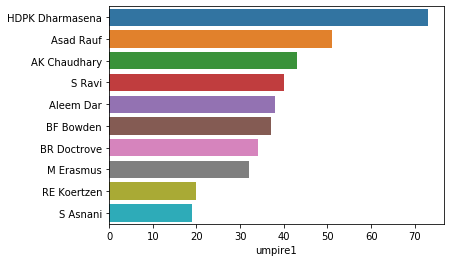

In [70]:
umpire1=matches.umpire1.value_counts()[:10]
sb.barplot(y = umpire1.index, x = umpire1, orient='h');

# most popular umpire2

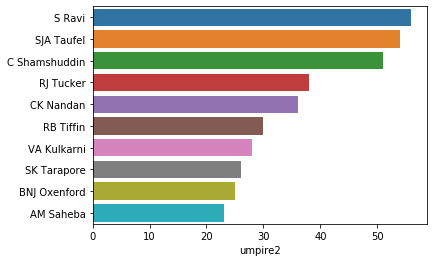

In [71]:
umpire2=matches.umpire2.value_counts()[:10]
sb.barplot(y = umpire2.index, x = umpire2, orient='h');

# toss winner analysis

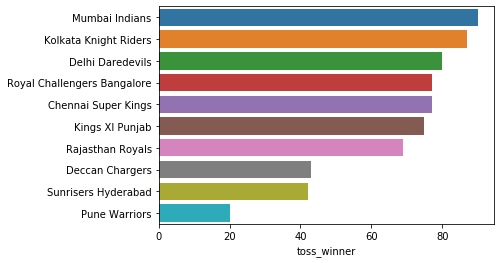

In [73]:
toss_winner=matches.toss_winner.value_counts()[:10]
sb.barplot(y = toss_winner.index, x = toss_winner, orient='h');